## <h2 style='text-align:center;'>  Teoria de Controle - Av. Espaço de Estado (Parte 1)

## <h2 style='text-align:center;'> Gabriel M. Duarte e Kleber R. da Silva Junior

##### <h5> Bibliotecas

In [1]:
import numpy as np
import sympy as sp
import control as ct
import matplotlib.pyplot as plt

##### <h5> Sistema

In [ ]:
s = ct.tf('s')
num_G = [0, 1, 11]
den_G = [1, 0, 3, 4]
G = ct.tf(num_G, den_G)
n = len(den_G)
G

TransferFunction(array([ 1, 11]), array([1, 0, 3, 4]))

## <h2  style='text-align:center;'> Questão (1)

##### <h5> A) Passagem da função de transferência de malha aberta para espaço de estado

In [ ]:
ultima_linha = np.zeros((1, n-1))
aux = (den_G[::-1])[:-1]

for i in range(len(aux)):
    ultima_linha[0][i] = -aux[i]

A = np.block([[np.zeros((n-2, 1)), np.eye(n-2)],
              [ultima_linha]])

B = np.block([[np.zeros((n-2, 1))],
              [1]])

C = (num_G[::-1])

D = [0]

print("A: ")
print(A)
print("B: ")
print(B)
print("C: ")
print(C)
print("D: ")
print(D)

A: 
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [-4. -3.  0.]]
B: 
[[0.]
 [0.]
 [1.]]
C: 
[11, 1, 0]
D: 
[0]


##### B) Controlabilidade do sistema

In [ ]:
C_ = np.block([[B, A@B, A@A@B]])

posto = np.linalg.matrix_rank(C_)
print("Posto =", posto)
print("Como o posto de C_ é igual a 'n', o sistema é controlável.")

Posto = 3
Como o posto de C_ é igual a 'n', o sistema é controlável.


##### <h5> C) Determinação do novo ponto de equilíbrio

Novo ponto de equilíbrio:
[[0.66666667]
 [0.        ]
 [0.        ]]
Autovalores da malha fechada = [-1. -2. -3.]


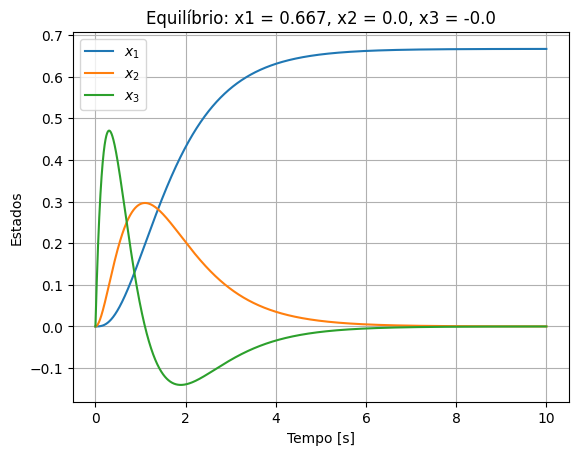

In [ ]:
# Ganho
K = np.array([[2, 8, 6]])

# Referência
r = 4

# X_eq
A_cl = A - B@K
X_eq = -np.linalg.inv(A_cl)@B*r
print("Novo ponto de equilíbrio:")
print(X_eq)

# Tempo
t0 = 0
tf = 10
Ts = 0.001
time = np.arange(t0, tf, Ts)

# Condição inicial dos estados
X = np.array([[0.0],
              [0.0],
              [0.0]])

# Atualização dos estados
X1 = float(X[0][0])
X2 = float(X[1][0])
X3 = float(X[2][0])

# Atualização dos vetores de estados
X1_vec = [X1]
X2_vec = [X2]
X3_vec = [X3]

# Condição inicial do sinal de controle
u = (r - K@X)[0][0]

# Atualização do vetor de sinal de controle
U_vec = [u]

# Simulação
for i in range(1, len(time)):

    X_dot = A@X + B*u
    X = X + X_dot*Ts

    u = (r - K@X)[0][0]

    X1 = X[0,0]
    X2 = X[1,0]
    X3 = X[2,0]

    X1_vec.append(X1)
    X2_vec.append(X2)
    X3_vec.append(X3)
    U_vec.append(u)

plt.title('Equilíbrio: x1 = ' + str(np.round(X1_vec[-1], 3)) + ', x2 = ' + str(np.round(X2_vec[-1], 3)) + ', x3 = ' + str(np.round(X3_vec[-1], 3)))
plt.plot(time, X1_vec, label='$x_1$')
plt.plot(time, X2_vec, label='$x_2$')
plt.plot(time, X3_vec, label='$x_3$')
plt.ylabel('Estados')
plt.xlabel('Tempo [s]')
plt.legend()
plt.grid()

print("Autovalores da malha fechada =", np.linalg.eig(A_cl)[0])

## <h2  style='text-align:center;'> Questão (2)

##### <h5> (F) Ao mudar a base de representação de um sistema, as matrizes assumem outros valores numérico e, portanto, os autovalores da matriz A na nova representação são, obviamente, diferentes.

##### <h5> Justificativa: Após a mudança de base, os estados podem não ter sentido físico, mas a saída e os autovalores serão os mesmos. Exemplo:

In [ ]:
A = np.array([[0, 1],
              [-3, -2]])

P = np.array([[1, 10],
              [3, 0]]) 

A_nova_base = P@A@np.linalg.inv(P)

print("Autovalores de A =", np.round(np.linalg.eig(A)[0],2))
print("Autovalores de A (nova base) =", np.round(np.linalg.eig(A_nova_base)[0],2))

Autovalores de A = [-1.+1.41j -1.-1.41j]
Autovalores de A (nova base) = [-1.+1.41j -1.-1.41j]


##### <h5> (F) Se um sistema é instável no espaço de estado, então ele não é controlável.

##### <h5> Justificativa: O fato de um sistema não ser controlável está ligado ao posto da matriz de controlabilidade. Um sistema pode ser instável em malha aberta, e estável com um controlador.

##### <h5> (F) Um sistema não controlável pode ser estabilizado por um ganho de realimentação de estado adequadamente projetado e assim voltar a ser controlável.

##### <h5> Justificativa: Se um sistema é não controlável, não existe um controlador que o torne estável.